# MNIST

The good old MNIST dataset.

This notebook is inspired by Ciresan's et al implementation. 

[Paper -->> "Deep Big Simple Neural Nets Excel on Handwritten Digit Recognition"](https://arxiv.org/pdf/1003.0358.pdf).

In [53]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD
from keras.utils import to_categorical,plot_model

from matplotlib import pyplot as plt
import numpy as np

##### Loading the data

In [54]:
(x_train,y_train),(x_test,y_test) = mnist.load_data()

##### Visual representation

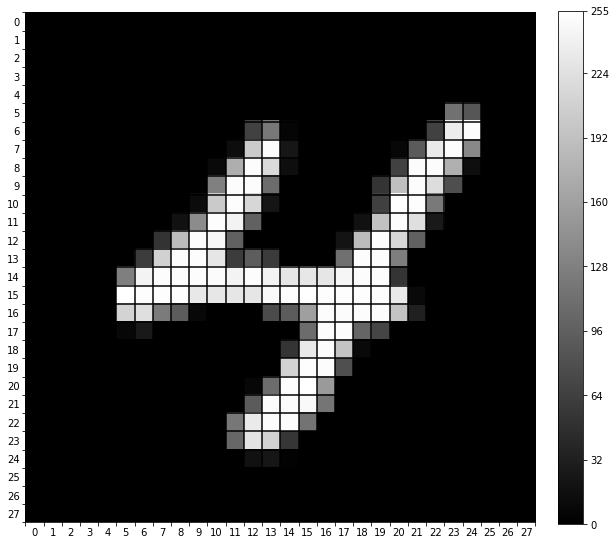

In [55]:
## getting a sample
sample = x_train[np.random.randint(0,x_train.shape[0])]

## plotting the sample

def show_mnist(sample):

    plt.figure(figsize = (10,10))
    plt.imshow(sample,cmap = 'gray')
    ax = plt.gca()

    
    plt.tick_params(axis='both',
                   which='major',
                   bottom=True,
                   left=True,
                   labelbottom=False,
                   labelleft=False)

    plt.tick_params(axis='both',
                   which='minor',
                   bottom=False,
                   left=False,
                   labelbottom=True,
                   labelleft=True)

    ax.set_xticks(np.arange(-.5, 28, 1))
    ax.set_yticks(np.arange(-.5, 28, 1))

    ax.set_xticks(np.arange(0, 28, 1), minor=True);
    ax.set_xticklabels([str(i) for i in np.arange(0, 28, 1)], minor=True);
    ax.set_yticks(np.arange(0, 28, 1), minor=True);
    ax.set_yticklabels([str(i) for i in np.arange(0, 28, 1)], minor=True);

    ax.grid(color='black', linestyle='-', linewidth=1.5)
    plt.colorbar(fraction=0.046, pad=0.04, ticks=[0,32,64,96,128,160,192,224,255])
    plt.show()
    
show_mnist(sample)

##### Preparing the dataset

In [56]:
## trasnforming data to the range [-1,1]
x_train = (x_train/127.5)-1 
x_test = (x_test/127.5)-1 

## reshaping the dataset to be a one dimentional array
x_train = x_train.reshape(60000,784).astype('float32')
x_test = x_test.reshape(10000,784).astype('float32')

print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (60000, 784)
60000 train samples
10000 test samples


In [42]:
## one-hot encoding the Y variable so we can uyse categorical_crossentropy
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

##### Modelling

In [58]:
## creating the model
model = Sequential()

## adding a dense layer of 2500 neurons with tanh activation an weights initialize with Xavier Glorot normal distribution
model.add(Dense(2500,input_shape=(784,),activation='tanh',kernel_initializer='glorot_normal'))
model.add(Dense(2000,activation='tanh',kernel_initializer='glorot_normal'))
model.add(Dense(1500,activation='tanh',kernel_initializer='glorot_normal'))
model.add(Dense(1000,activation='tanh',kernel_initializer='glorot_normal'))
model.add(Dense(500,activation='tanh',kernel_initializer='glorot_normal'))

## final layers
model.add(Dense(10, activation='softmax'))

## compiling the model
model.compile(loss=keras.losses.categorical_crossentropy,optimizer=SGD(lr=0.1),metrics=['accuracy'])

plot_model(model,to_file='model.png',show_shapes=True)
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_31 (Dense)             (None, 2500)              1962500   
_________________________________________________________________
dense_32 (Dense)             (None, 2000)              5002000   
_________________________________________________________________
dense_33 (Dense)             (None, 1500)              3001500   
_________________________________________________________________
dense_34 (Dense)             (None, 1000)              1501000   
_________________________________________________________________
dense_35 (Dense)             (None, 500)               500500    
_________________________________________________________________
dense_36 (Dense)             (None, 10)                5010      
Total params: 11,972,510
Trainable params: 11,972,510
Non-trainable params: 0
__________________________________________

In [44]:
## training

history = model.fit(x_train, y_train,
          batch_size=128,
          epochs=20,
          verbose=1,
          validation_data=(x_test, y_test))

score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 41s 675us/step - loss: 13.8141 - accuracy: 0.1028 - val_loss: 17.5806 - val_accuracy: 0.0980
Epoch 2/20
60000/60000 [==============================] - 41s 682us/step - loss: 5.7382 - accuracy: 0.4421 - val_loss: 0.3380 - val_accuracy: 0.8984
Epoch 3/20
60000/60000 [==============================] - 41s 680us/step - loss: 0.2956 - accuracy: 0.9089 - val_loss: 0.2386 - val_accuracy: 0.9268
Epoch 4/20
60000/60000 [==============================] - 41s 680us/step - loss: 0.1722 - accuracy: 0.9460 - val_loss: 0.1477 - val_accuracy: 0.9562
Epoch 5/20
60000/60000 [==============================] - 41s 678us/step - loss: 0.1239 - accuracy: 0.9611 - val_loss: 0.1246 - val_accuracy: 0.9601
Epoch 6/20
60000/60000 [==============================] - 40s 670us/step - loss: 0.0983 - accuracy: 0.9692 - val_loss: 0.1014 - val_accuracy: 0.9674
Epoch 7/20
60000/60000 [==============================

##### Evaluation

In [49]:
loss = history.history['loss']
val_loss = history.history['val_loss']
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

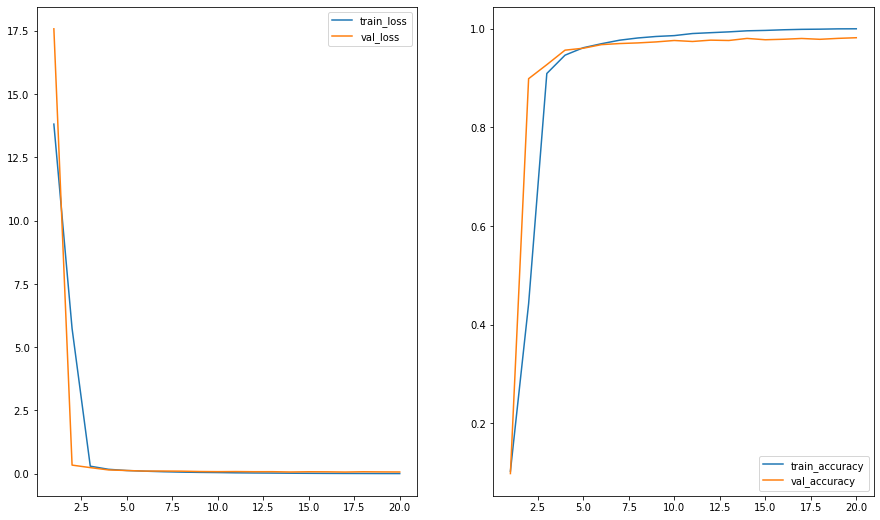

In [50]:
def generate_loss_curves(loss,val_loss,acc,val_acc):

    '''
    plot the loss and accuracy curves
    '''

    _, axs = plt.subplots(1,2,figsize=(15,9))

    axs[0].plot(list(range(1,21)),loss,label='train_loss')
    axs[0].plot(list(range(1,21)),val_loss,label='val_loss')
    axs[0].legend()

    axs[1].plot(list(range(1,21)),acc,label='train_accuracy')
    axs[1].plot(list(range(1,21)),val_acc,label='val_accuracy')
    axs[1].legend()

    plt.show()
    
generate_loss_curves(loss,val_loss,acc,val_acc)

The model created generelizes pretty well after three or four epochs, some tweaking may be necessary to achieve the paper\'s acc (99.61%).